In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats

In [83]:
data = pd.read_csv("../../../datasets/electronic-health-record/output/transformed_electronic_health_record_dataset_for_analytics.csv")

In [84]:
data.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,...,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Manhattan,1458,New York-Presbyterian Hospital - New York Weil...,0 to 17,104,F,Other Race,Spanish/Hispanic,10,...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,3,Major,Minor,Medical,Private Health Insurance,N,9.872085,9.072055
1,New York City,Manhattan,1464,New York-Presbyterian Hospital - Columbia Pres...,0 to 17,109,M,White,Not Span/Hispanic,4,...,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Moderate,Medical,Medicaid,Y,9.170213,8.330147
2,Central NY,Tompkins,977,Cayuga Medical Center at Ithaca,0 to 17,148,M,Other Race,Not Span/Hispanic,3,...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,2,Moderate,Minor,Medical,Self-Pay,N,7.034587,6.753241
3,New York City,Kings,1306,New York - Presbyterian Brooklyn Methodist Hos...,0 to 17,112,F,Black/African American,Not Span/Hispanic,1,...,9,"DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEO...",1,Minor,Minor,Medical,Medicaid,Y,7.858378,6.952654
4,Finger Lakes,Chemung,116,Arnot Ogden Medical Center,0 to 17,148,F,White,Not Span/Hispanic,1,...,15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Medicaid,N,6.783993,6.070277


In [85]:
for column in data.columns:
    print(f"{column}: \nType: {data[column].dtype} \nNumber of unique values: {data[column].nunique()}\n")

Hospital Service Area: 
Type: object 
Number of unique values: 8

Hospital County: 
Type: object 
Number of unique values: 56

Permanent Facility Id: 
Type: int64 
Number of unique values: 191

Facility Name: 
Type: object 
Number of unique values: 190

Age Group: 
Type: object 
Number of unique values: 5

Zip Code - 3 digits: 
Type: int64 
Number of unique values: 50

Gender: 
Type: object 
Number of unique values: 2

Race: 
Type: object 
Number of unique values: 4

Ethnicity: 
Type: object 
Number of unique values: 3

Length of Stay: 
Type: int64 
Number of unique values: 106

Type of Admission: 
Type: object 
Number of unique values: 5

Patient Disposition: 
Type: object 
Number of unique values: 19

CCSR Diagnosis Code: 
Type: object 
Number of unique values: 376

CCSR Diagnosis Description: 
Type: object 
Number of unique values: 376

CCSR Procedure Code: 
Type: object 
Number of unique values: 290

CCSR Procedure Description: 
Type: object 
Number of unique values: 290

APR DRG C

Univariate Analysis

Finding business insights oriented towards:
- Financial benefits
- Better resource management

In [86]:
def univariate_analysis(data, columns,title="Overall Univariate Analysis"):
    plt.figure(figsize=(20,10 * len(columns) // 2))
    rows = (len(columns) + 1) // 2
    ind = 1

    sns.set_style("whitegrid")
    plt.suptitle(title, fontsize=25)
    plt.subplots_adjust(hspace=0.5, wspace=0.25)
    
    for column in columns:
        plt.subplot(rows, 2, ind)
        
        if data[column].dtype == "object":
            sns.countplot(x=data[column], hue=data[column], order=data[column].value_counts().index, hue_order=data[column].value_counts().index, palette="crest")
        else:
            sns.histplot(x=data[column], color="#37888d")
            
        plt.title(f"Distribution of {column}")
        plt.ylabel("Frequency")
        plt.xticks(rotation=90)
        ind += 1
        
    file_path = "../insights/"
    file_name = re.sub("[^a-zA-Z0-9]", "_", title.lower())
    
    plt.savefig(file_path + file_name, bbox_inches="tight", pad_inches=0.5)
    plt.show()

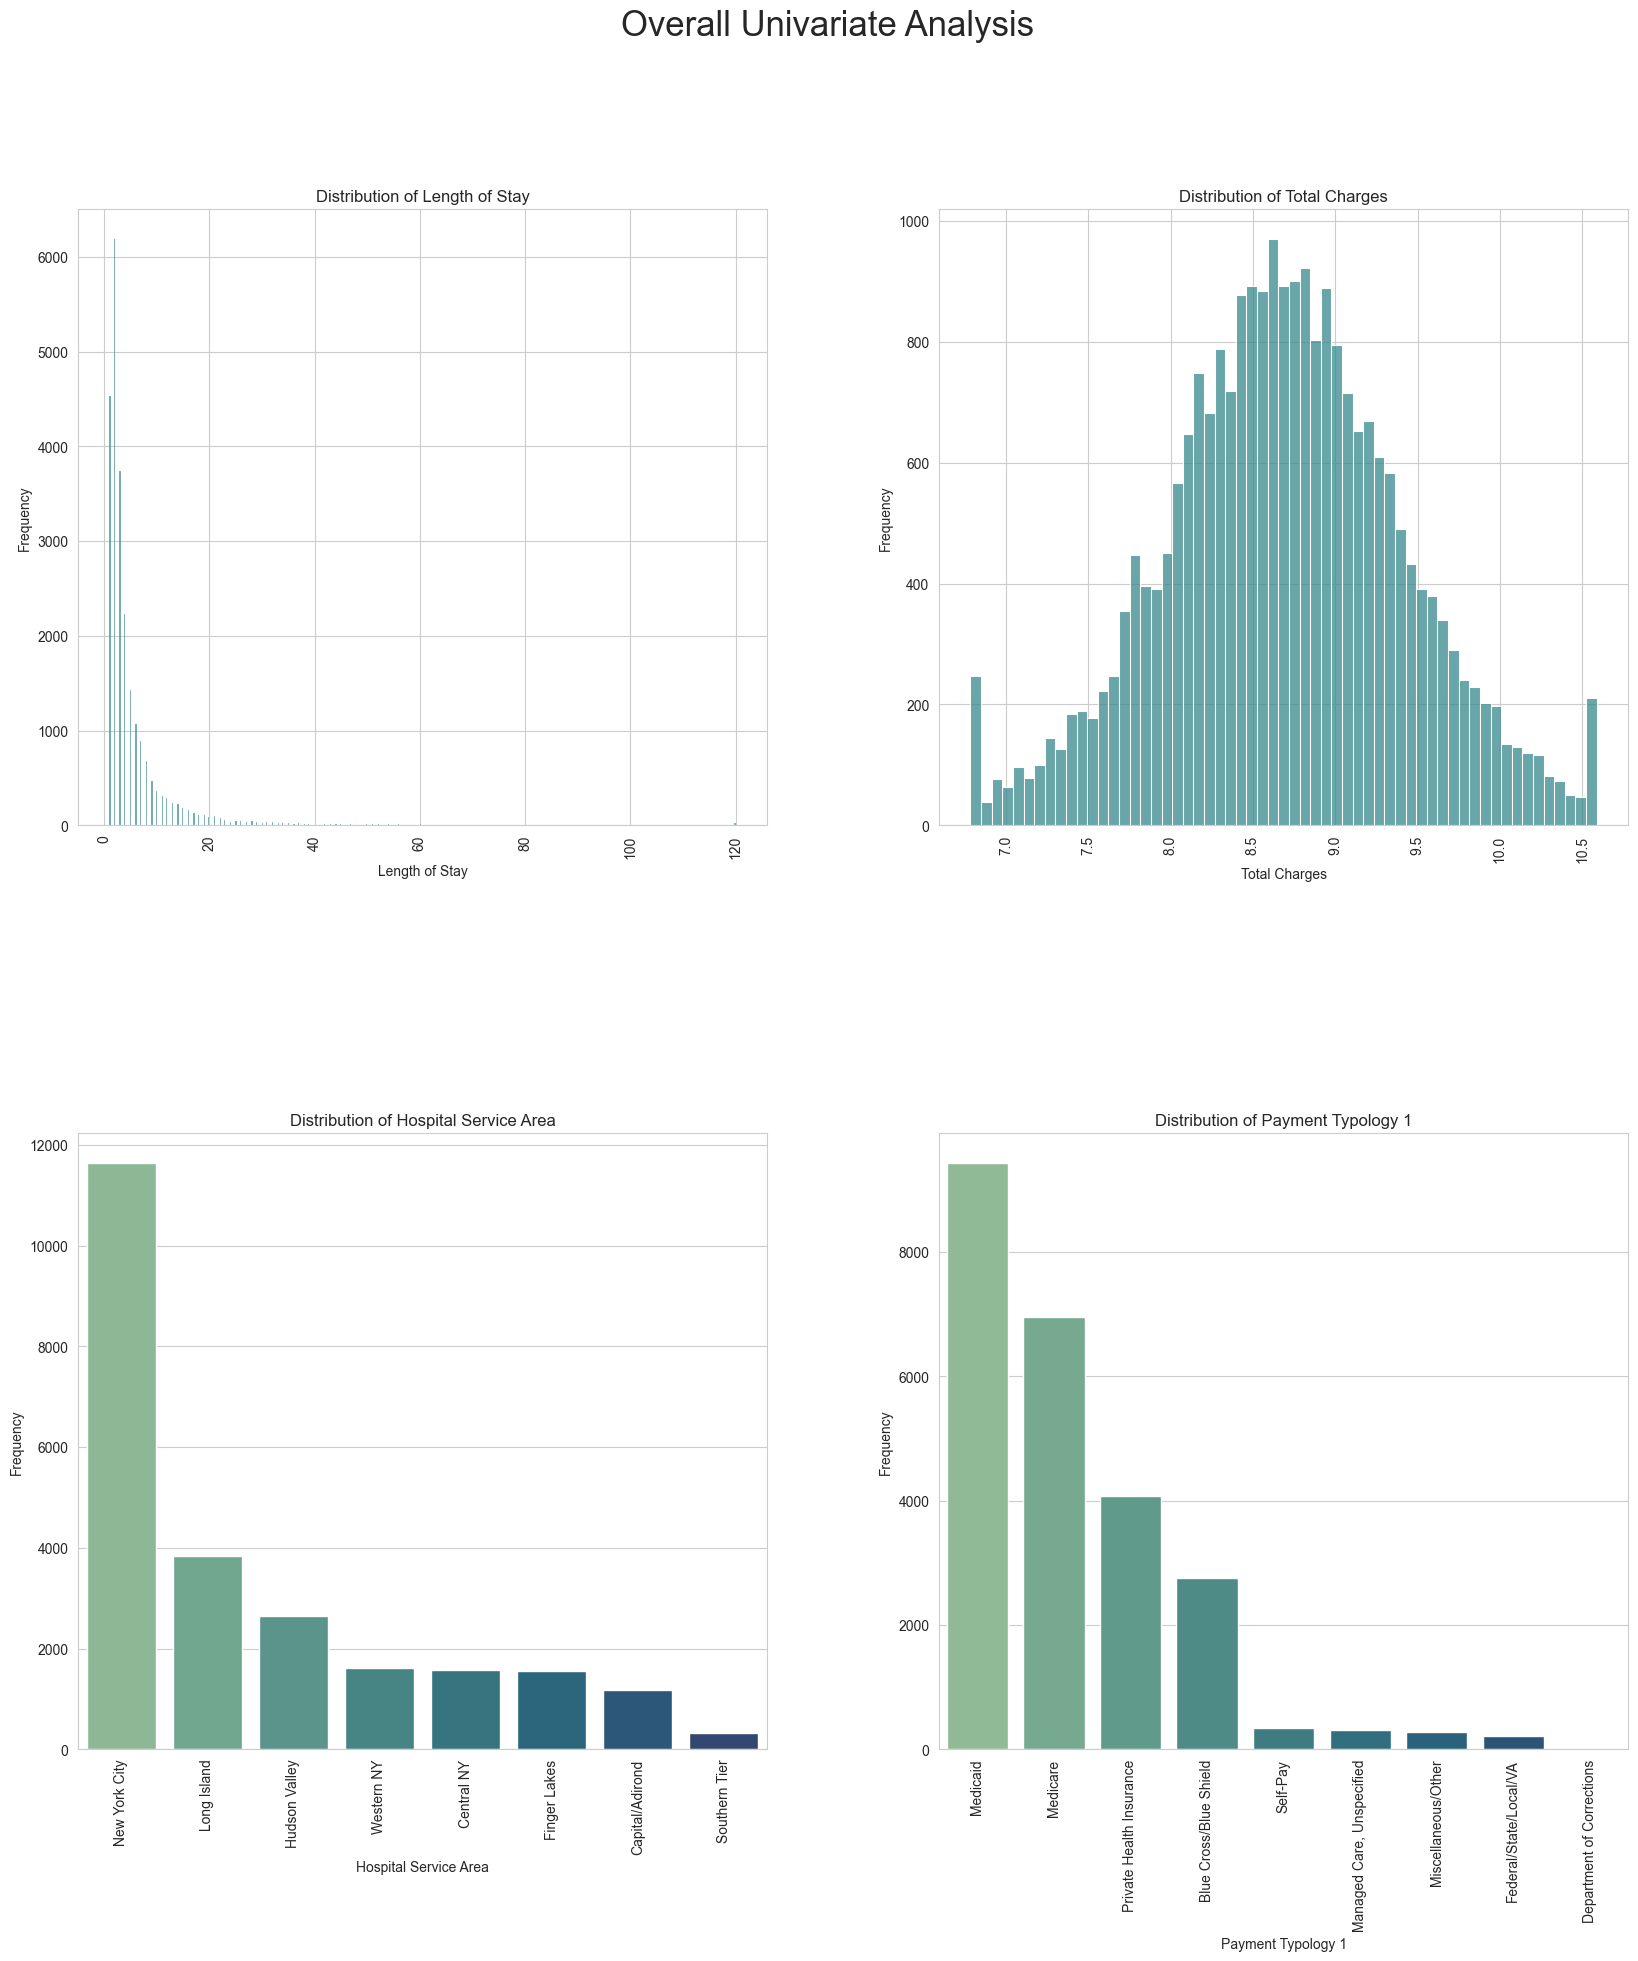

In [87]:
columns_for_analysis = ["Length of Stay", "Total Charges", "Hospital Service Area", "Payment Typology 1"]
univariate_analysis(data, columns_for_analysis)

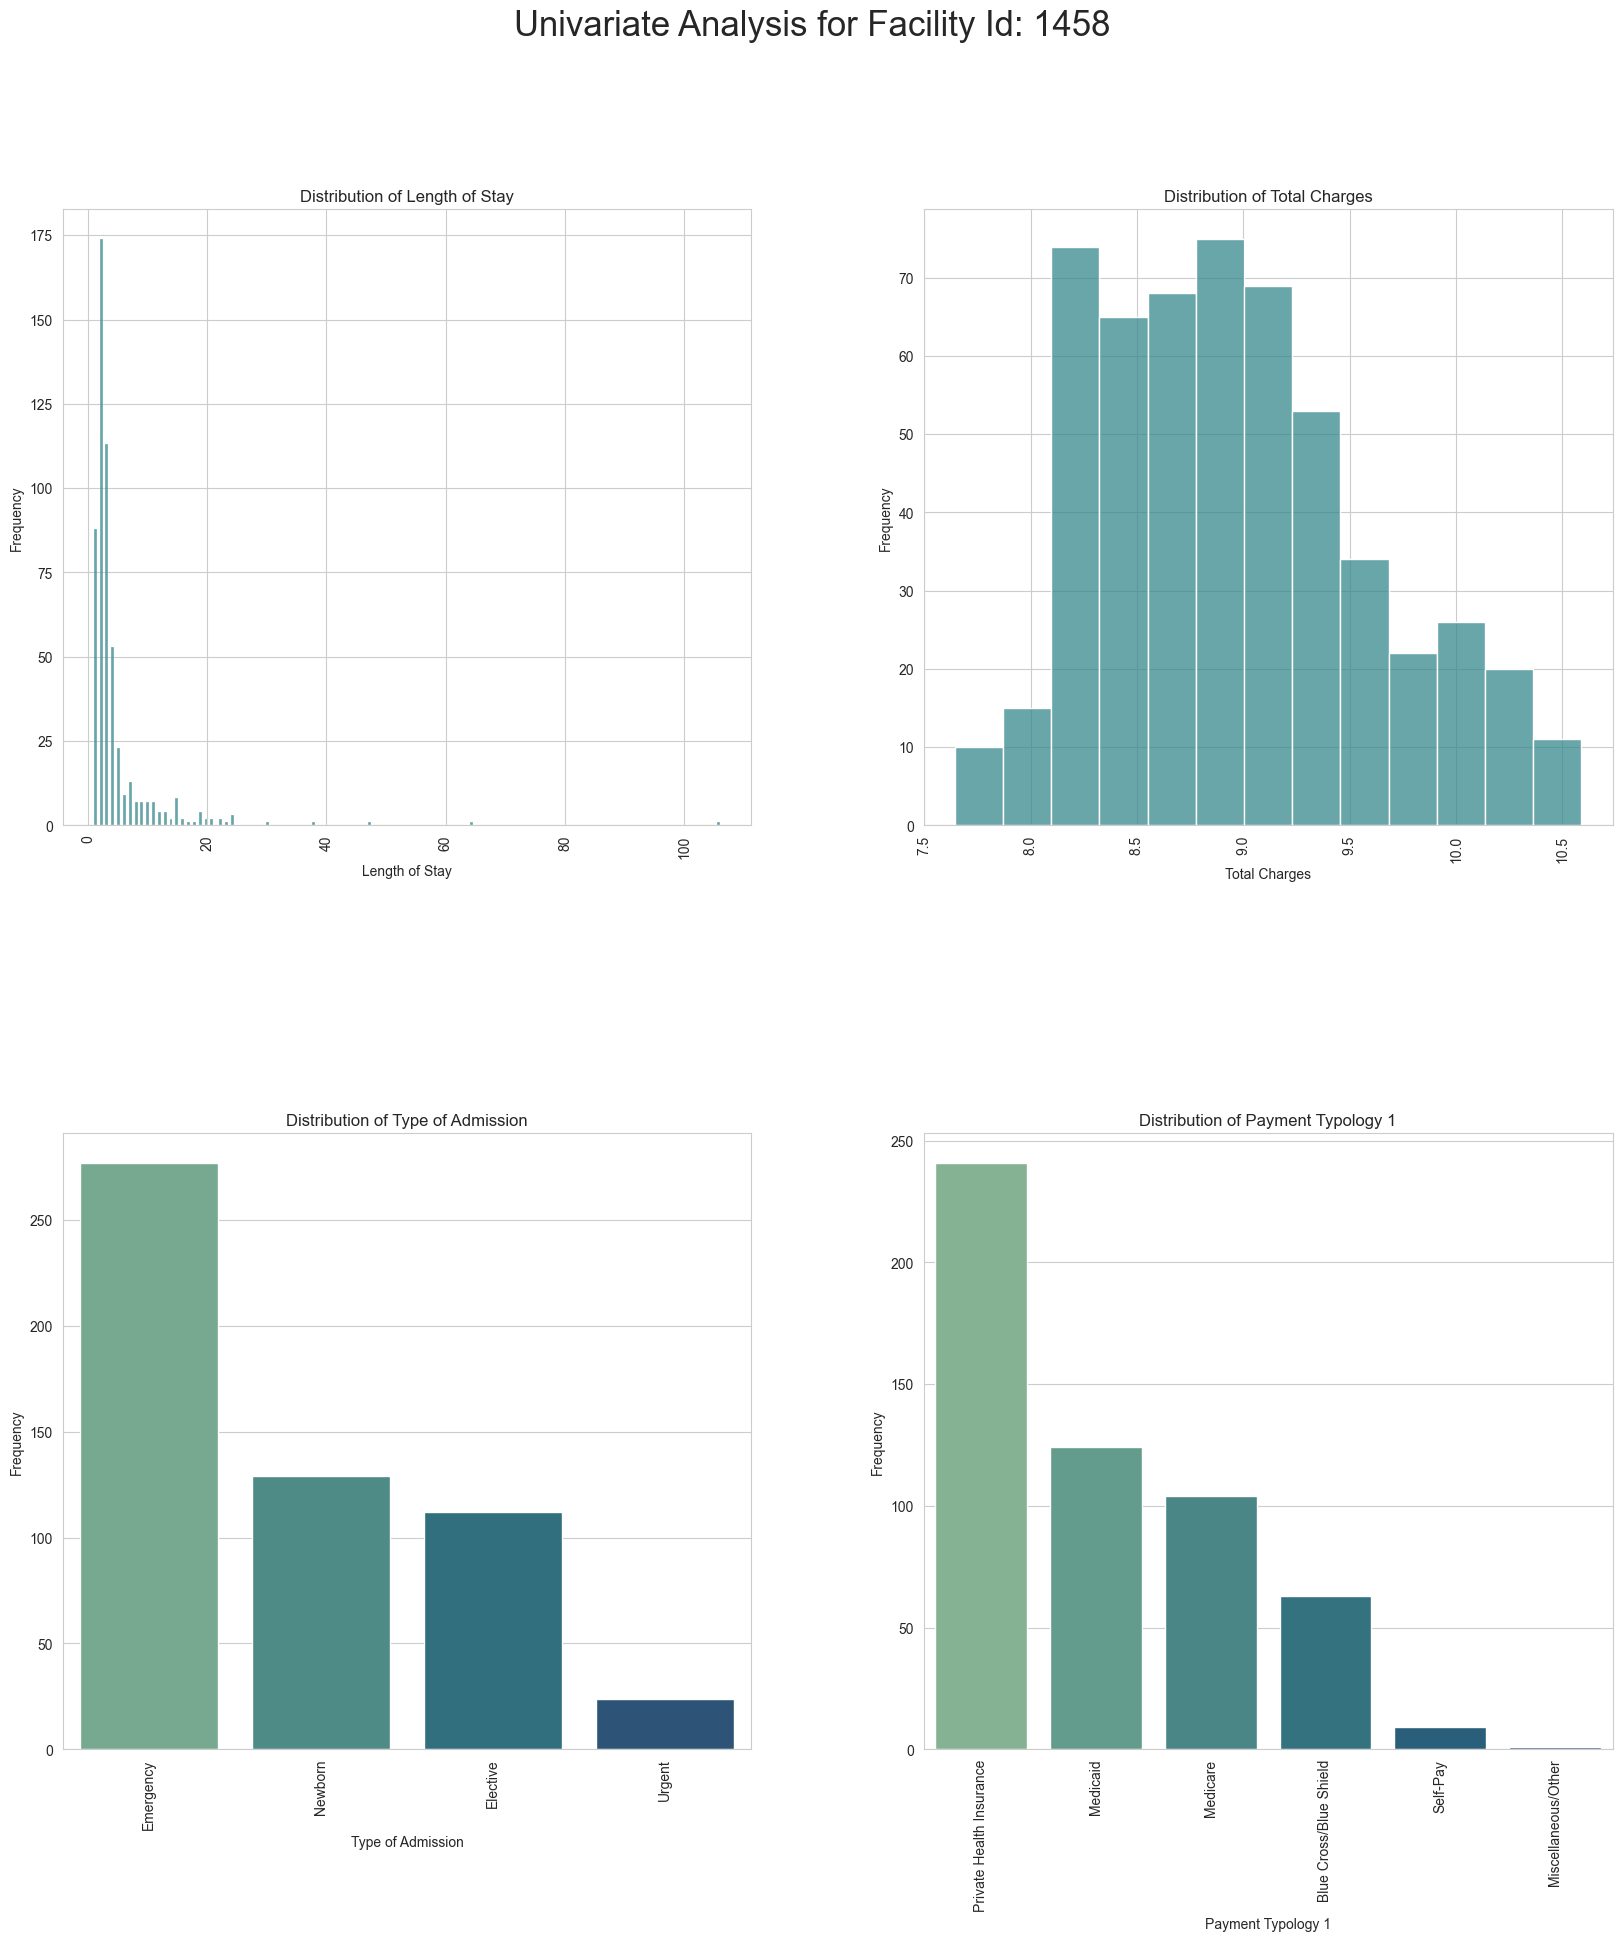

In [88]:
random_hospital_id = 1458
# data["Permanent Facility Id"].sample(n=1).item()
columns_for_analysis = ["Length of Stay", "Total Charges", "Type of Admission", "Payment Typology 1"]
univariate_analysis(data[data["Permanent Facility Id"] == random_hospital_id], columns_for_analysis, title=f"Univariate Analysis for Facility Id: {random_hospital_id}")

Bivariate analysis

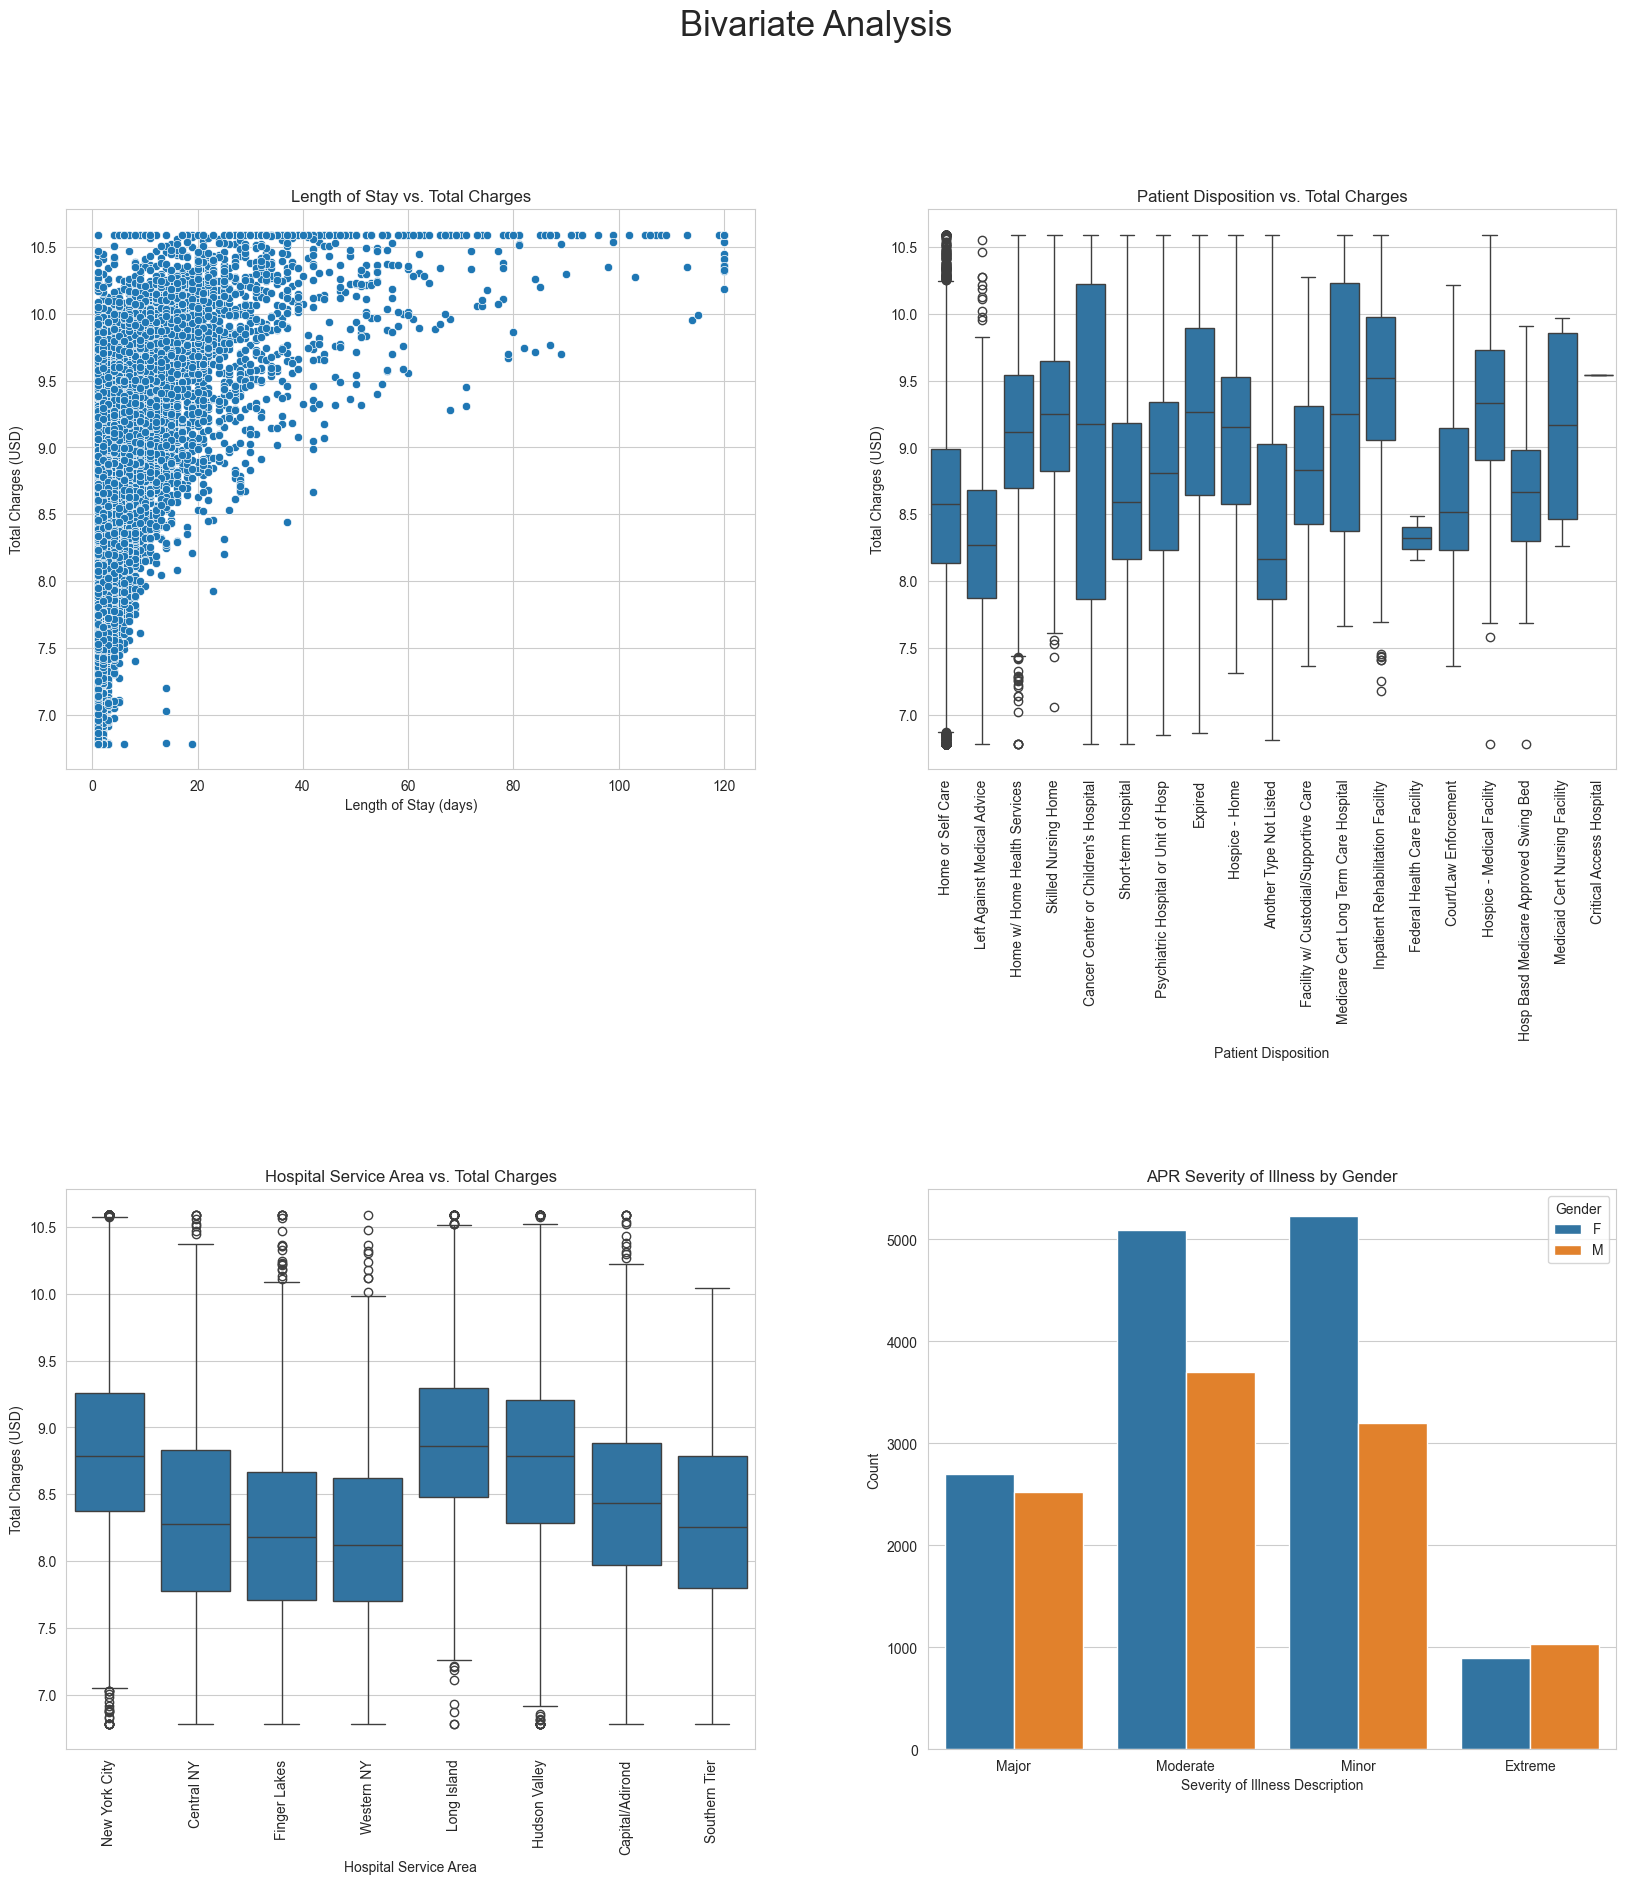

In [99]:
plt.figure(figsize=(20, 20))
sns.set_style("whitegrid")
plt.suptitle("Bivariate Analysis", fontsize=25)
plt.subplots_adjust(hspace=0.75, wspace=0.25)

plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='Length of Stay', y='Total Charges')
plt.title('Length of Stay vs. Total Charges')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Total Charges (USD)')


plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='Patient Disposition', y='Total Charges')
plt.title('Patient Disposition vs. Total Charges')
plt.xlabel('Patient Disposition')
plt.xticks(rotation=90)
plt.ylabel('Total Charges (USD)')


plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='Hospital Service Area', y='Total Charges')
plt.title('Hospital Service Area vs. Total Charges')
plt.xlabel('Hospital Service Area')
plt.xticks(rotation=90)
plt.ylabel('Total Charges (USD)')


plt.subplot(2, 2, 4)
sns.countplot(data=data, x='APR Severity of Illness Description', hue='Gender')
plt.title('APR Severity of Illness by Gender')
plt.xlabel('Severity of Illness Description')
plt.ylabel('Count')

plt.savefig("../insights/bivariate_analysis", bbox_inches="tight", pad_inches=0.5)
plt.show()